In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 10 ##

## Prediction ##

In [2]:
galton = Table.read_table('galton.csv')
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
3,75,64,72.06,2,1,male,71
3,75,64,72.06,2,2,female,68


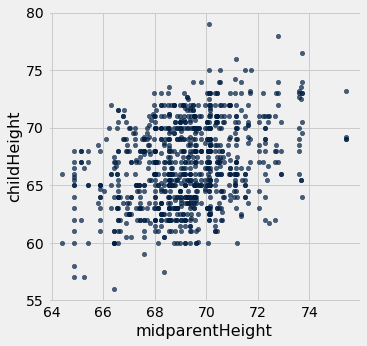

In [3]:
galton.scatter('midparentHeight', 'childHeight')

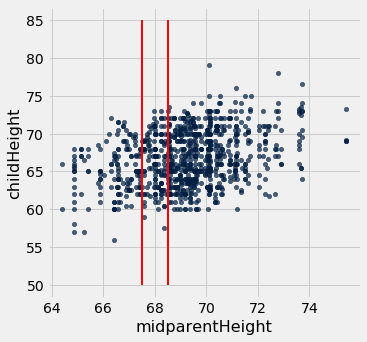

In [4]:
galton.scatter('midparentHeight', 'childHeight')
plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plots.plot([68.5, 68.5], [50, 85], color='red', lw=2);

In [5]:
nearby = galton.where('midparentHeight', are.between(67.5, 68.5))
nearby_mean = nearby.column('childHeight').mean()
nearby_mean

66.24045801526718

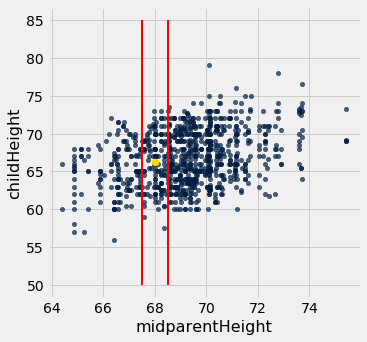

In [6]:
galton.scatter('midparentHeight', 'childHeight')
plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plots.plot([68.5, 68.5], [50, 85], color='red', lw=2)
plots.scatter(68, nearby_mean, color='gold', s=50);

In [7]:
def predict(h):
    nearby = galton.where('midparentHeight', are.between(h - 1/2, h + 1/2))
    return nearby.column('childHeight').mean()

In [8]:
predict(68)

66.24045801526718

In [9]:
predict(70)

67.27285067873302

In [10]:
predict(73)

69.5

In [11]:
predicted_heights = galton.apply(predict, 'midparentHeight')
predicted_heights

array([70.1       , 70.1       , 70.1       , 70.1       , 70.41578947,
       70.41578947, 70.41578947, 70.41578947, 68.5025    , 68.5025    ,
       68.5025    , 68.5025    , 68.5025    , 68.5025    , 68.5025    ,
       66.43149606, 66.43149606, 66.43149606, 66.43149606, 66.43149606,
       66.43149606, 70.41578947, 70.41578947, 70.41578947, 70.41578947,
       70.41578947, 70.41578947, 70.41578947, 69.18571429, 69.18571429,
       69.18571429, 69.18571429, 68.66052632, 67.63423913, 67.63423913,
       67.63423913, 67.63423913, 67.63423913, 67.63423913, 67.63423913,
       67.63423913, 67.37410714, 68.77428571, 68.77428571, 68.77428571,
       68.77428571, 68.59230769, 68.59230769, 68.59230769, 68.07323944,
       68.07323944, 68.07323944, 68.07323944, 68.07323944, 68.07323944,
       68.07323944, 68.07323944, 68.07323944, 68.05465116, 68.05465116,
       68.05465116, 68.05465116, 68.05465116, 68.05465116, 67.56276596,
       67.56276596, 67.56276596, 67.71678832, 70.41578947, 70.41

In [12]:
galton = galton.with_column('predictedHeight', predicted_heights)

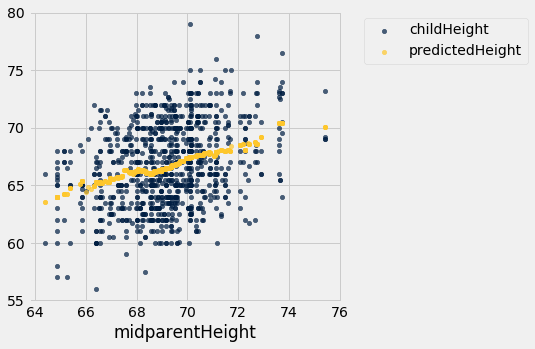

In [13]:
galton.select(
    'midparentHeight', 'childHeight', 'predictedHeight').scatter('midparentHeight')

## Prediction Accuracy ##

In [14]:
def difference(x, y):
    return x - y

In [15]:
pred_errs = galton.apply(difference, 'childHeight', 'predictedHeight')
pred_errs

array([ 3.10000000e+00, -9.00000000e-01, -1.10000000e+00, -1.10000000e+00,
        3.08421053e+00,  2.08421053e+00, -4.91578947e+00, -4.91578947e+00,
        2.49750000e+00, -5.02500000e-01,  1.99750000e+00, -2.50000000e-03,
       -1.50250000e+00, -4.00250000e+00, -5.50250000e+00,  5.56850394e+00,
        2.56850394e+00,  1.56850394e+00,  6.85039370e-02, -3.93149606e+00,
       -3.93149606e+00, -9.15789474e-01,  6.08421053e+00,  3.58421053e+00,
        2.58421053e+00,  2.58421053e+00,  8.42105263e-02, -6.41578947e+00,
        1.31428571e+00, -1.18571429e+00, -3.18571429e+00, -3.18571429e+00,
       -3.16052632e+00,  6.36576087e+00,  2.36576087e+00,  3.65760870e-01,
       -6.34239130e-01, -6.34239130e-01, -1.63423913e+00, -4.13423913e+00,
       -4.63423913e+00, -2.37410714e+00,  2.22571429e+00, -6.77428571e+00,
       -7.74285714e-01, -1.77428571e+00,  2.40769231e+00,  1.90769231e+00,
       -1.89230769e+00,  3.92676056e+00,  2.42676056e+00,  2.12676056e+00,
        2.12676056e+00,  

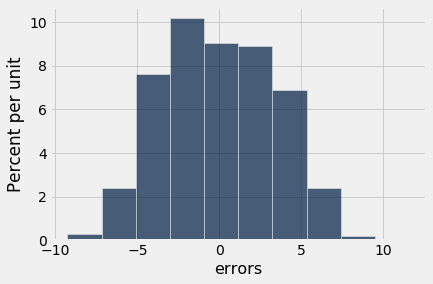

In [17]:
galton.hist('errors')

In [16]:
galton = galton.with_column('errors',pred_errs)
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight,predictedHeight,errors
1,78.5,67,75.43,4,1,male,73.2,70.1,3.1
1,78.5,67,75.43,4,2,female,69.2,70.1,-0.9
1,78.5,67,75.43,4,3,female,69,70.1,-1.1
1,78.5,67,75.43,4,4,female,69,70.1,-1.1
2,75.5,66.5,73.66,4,1,male,73.5,70.4158,3.08421
2,75.5,66.5,73.66,4,2,male,72.5,70.4158,2.08421
2,75.5,66.5,73.66,4,3,female,65.5,70.4158,-4.91579
2,75.5,66.5,73.66,4,4,female,65.5,70.4158,-4.91579
3,75,64,72.06,2,1,male,71,68.5025,2.4975
3,75,64,72.06,2,2,female,68,68.5025,-0.5025


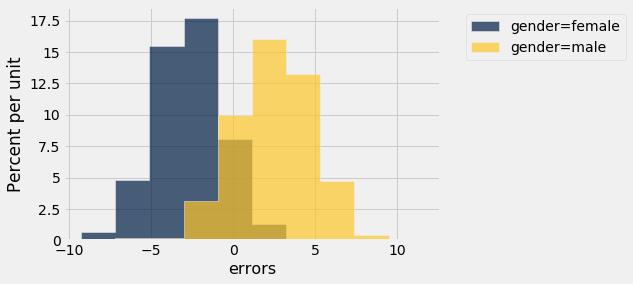

In [27]:
galton.hist('errors', group='gender')

# Discussion Question

In [20]:
def predict_smarter(h, g):
    nearby = galton.where('midparentHeight', are.between(h - 1/2, h + 1/2))
    nearby_same_gender = nearby.where('gender', g)
    return nearby_same_gender.column('childHeight').mean()

In [21]:
predict_smarter(68, 'female')

62.909259259259265

In [22]:
predict_smarter(68, 'male')

68.57662337662337

In [23]:
smarter_predicted_heights = galton.apply(predict_smarter, 'midparentHeight', 'gender')
galton = galton.with_column('smartPredictedHeight', smarter_predicted_heights)

In [25]:
smarter_pred_errs = galton.apply(difference, 'childHeight', 'smartPredictedHeight')
galton = galton.with_column('smartErrors', smarter_pred_errs)

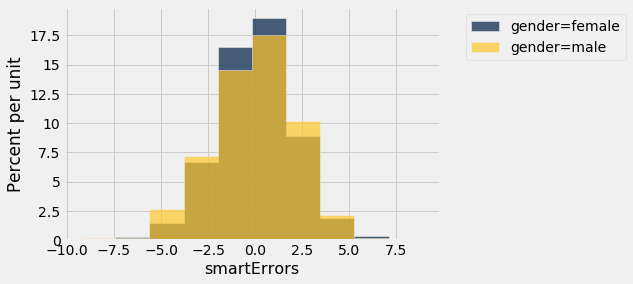

In [26]:
galton.hist('smartErrors', group='gender')

## Grouping by One Column ##

In [28]:
cones = Table.read_table('cones.csv')

In [29]:
cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [30]:
cones.group('Flavor')

Flavor,count
bubblegum,1
chocolate,3
strawberry,2


In [31]:
cones.drop('Color').group('Flavor', np.average)

Flavor,Price average
bubblegum,4.75
chocolate,5.08333
strawberry,4.4


In [32]:
cones.drop('Color').group('Flavor', min)

Flavor,Price min
bubblegum,4.75
chocolate,4.75
strawberry,3.55


## Grouping By One Column: Welcome Survey ##

In [34]:
survey = Table.read_table('welcome_survey_v2.csv')

In [36]:
survey.group('Year', np.average)

Year,Extraversion average,Number of Texters average,Hours of Sleep average
First,5.86057,8.66449,7.04248
Fourth or above,5.48175,5.59124,7
Second,5.87733,7.90667,6.9232
Third,5.61258,6.29801,7.09934


In [37]:
by_extra = survey.group('Extraversion', np.average)
by_extra

Extraversion,Year average,Number of Texters average,Hours of Sleep average
1,,3.35714,6.5
2,,3.65306,7.14286
3,,4.65132,7.02961
4,,6,7.03652
5,,6.37569,7.12707
6,,7.65116,6.90698
7,,8.89427,7.07269
8,,9.41624,6.96548
9,,10.25,7.03472
10,,17,6.69355


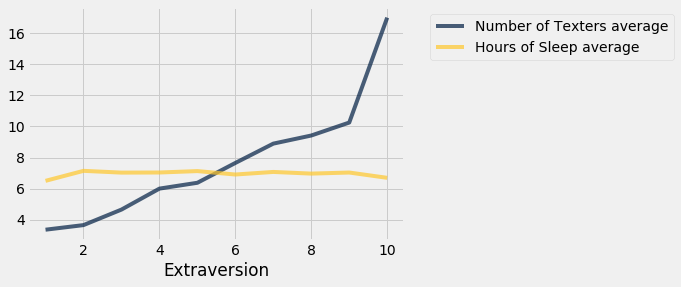

In [38]:
by_extra.select(0,2,3).plot('Extraversion') # Drop the 'Years average' column

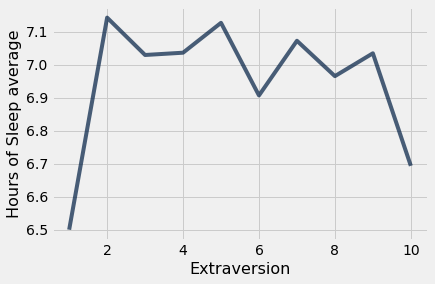

In [40]:
by_extra.select(0,3).plot('Extraversion')

## Lists

In [57]:
[1, 5, 'hello', 5.0]

[1, 5, 'hello', 5.0]

In [58]:
[1, 5, 'hello', 5.0, make_array(1,2,3)]

[1, 5, 'hello', 5.0, array([1, 2, 3])]

## Grouping by Two Columns ##

In [45]:
survey = Table.read_table('welcome_survey_v3.csv')

In [47]:
survey.group(['Handedness','Sleep Side']).show()

Handedness,Sleep Side,count
Ambidextrous,back,3
Ambidextrous,left side,2
Ambidextrous,right side,1
Ambidextrous,stomach,2
Left-handed,back,29
Left-handed,left side,25
Left-handed,right side,30
Left-handed,stomach,19
Right-handed,back,275
Right-handed,left side,285


## Pivot Tables

In [49]:
survey.pivot('Sleep Side', 'Handedness')

Handedness,back,left side,right side,stomach
Ambidextrous,3,2,1,2
Left-handed,29,25,30,19
Right-handed,275,285,380,193


In [53]:
survey.pivot('Sleep Side', 'Handedness', values='Extraversion', collect=np.average)

Handedness,back,left side,right side,stomach
Ambidextrous,3,3.5,3,4.5
Left-handed,5.75862,6.12,5.86667,6.31579
Right-handed,5.76364,5.71579,5.83684,5.72021


In [54]:
survey.group('Handedness', np.average)

Handedness,Year average,Extraversion average,Number of Texters average,Hours of Sleep average,Sleep Side average
Ambidextrous,,3.5,6.25,6.375,
Left-handed,,5.98058,6.93204,7.10194,
Right-handed,,5.76876,7.62136,7.01518,
